In [3]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("/content/sample-data.csv")
df.head()

,id,description
0,1,Active classic boxers - There's a reason why o...
1,2,Active sport boxer briefs - Skinning up Glory ...
2,3,Active sport briefs - These superbreathable no...
3,4,"Alpine guide pants - Skin in, climb ice, switc..."
4,5,"Alpine wind jkt - On high ridges, steep ice an..."


In [4]:
# Check for missing values
print(df.isnull().sum())

# Drop missing values if any
df.dropna(inplace=True)


id             0
description    0
dtype: int64


In [5]:
# Convert text descriptions to numerical features using TF-IDF
vectorizer = TfidfVectorizer(stop_words="english")
X = vectorizer.fit_transform(df["description"])

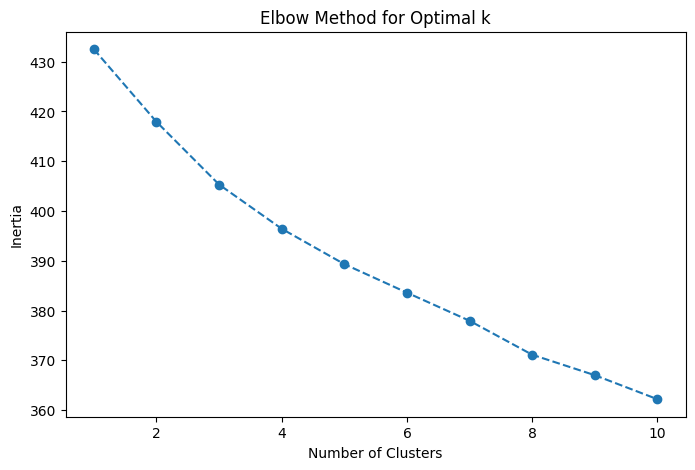

In [6]:
# Find the optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()



In [7]:
# Choose the best k (e.g., k=4) and apply K-Means
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X)

# Display clusters
print(df[["id", "description", "Cluster"]])

# Save clustered data
df.to_csv("clustered_products.csv", index=False)

print("Product clustering completed! 🚀")

      id                                        description  Cluster
0      1  Active classic boxers - There's a reason why o...        0
1      2  Active sport boxer briefs - Skinning up Glory ...        2
2      3  Active sport briefs - These superbreathable no...        2
3      4  Alpine guide pants - Skin in, climb ice, switc...        1
4      5  Alpine wind jkt - On high ridges, steep ice an...        1
..   ...                                                ...      ...
495  496  Cap 2 bottoms - Cut loose from the maddening c...        0
496  497  Cap 2 crew - This crew takes the edge off fick...        0
497  498  All-time shell - No need to use that morning T...        1
498  499  All-wear cargo shorts - All-Wear Cargo Shorts ...        2
499  500  All-wear shorts - Time to simplify? Our All-We...        2

[500 rows x 3 columns]
Product clustering completed! 🚀


In [8]:
print(df["Cluster"].value_counts())


Cluster
2    244
1    132
0     63
3     61
Name: count, dtype: int64


In [9]:
for cluster in df["Cluster"].unique():
    print(f"\nCluster {cluster}:")
    print(df[df["Cluster"] == cluster]["description"].head(5))  # Show first 5 products



Cluster 0:
0     Active classic boxers - There's a reason why o...
17    Cap 1 bottoms - Spring skiing is as transient ...
18    Cap 1 boxer briefs - On bivy or belay, the for...
19    Cap 1 graphic t-shirt - This tee is made from ...
20    Cap 1 t-shirt - Minimally styled but technical...
Name: description, dtype: object

Cluster 2:
1     Active sport boxer briefs - Skinning up Glory ...
2     Active sport briefs - These superbreathable no...
7     Print banded betina btm - Our fullest coverage...
10    Baby sunshade top - Soft, stretchy polyester f...
11    Baggies shorts - Even Baggies, our most popula...
Name: description, dtype: object

Cluster 1:
3    Alpine guide pants - Skin in, climb ice, switc...
4    Alpine wind jkt - On high ridges, steep ice an...
5    Ascensionist jkt - Our most technical soft she...
6    Atom - A multitasker's cloud nine, the Atom pl...
8    Baby micro d-luxe cardigan - Micro D-Luxe is a...
Name: description, dtype: object

Cluster 3:
25    City by the 